In [468]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import os
import matplotlib.pyplot as plt

sns.set_theme()

In [533]:
df = pd.read_csv("data_files/train.csv")
val_df = pd.read_csv("data_files/val.csv")

df["region"] = df["region"].replace('0', "Other")

In [451]:
# df["revenue"] = df["revenue"].apply(lambda x: x if x < border else border)

In [534]:
df["log_revenue"] = np.log(df["revenue"] + 1)
y = df["log_revenue"]

In [535]:
df.head(5)

,user,accounts_count,deposit_count,withdrawal_count,trade_sum_usd,trade_profit_usd,trades_count,revenue,region,device,log_revenue
0,0064320d,2.0,2.0,0.0,1.690858e+05,61.98,52.0,272.575580,Middle-Earth,Web,5.611578
1,00667485,1.0,0.0,0.0,0.000000e+00,0.00,0.0,688.525868,Narnia,Web,6.536004
2,007a1435,1.0,12.0,3.0,9.951514e+06,234.73,221.0,697.083600,Middle-Earth,Web,6.548339
3,01c07c64,2.0,0.0,0.0,0.000000e+00,0.00,0.0,521.601752,Narnia,Web,6.258820
4,01e9a5cc,4.0,6.0,3.0,0.000000e+00,0.00,0.0,2411.195140,Oz,Web,7.788292


In [522]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df["region"].values.reshape(-1, 1))
oh_features = enc.transform(df["region"].values.reshape(-1, 1)).toarray()

for i, category in enumerate(enc.categories_[0]):
    df["region" + '_' + category] = oh_features[:, i]
df.drop("region", axis=1, inplace=True)

In [523]:
df

,user,accounts_count,deposit_count,withdrawal_count,trade_sum_usd,trade_profit_usd,trades_count,revenue,device,log_revenue,...,region_Forgotten Realms,region_Galaxy Far Far Away,region_Hyboria,region_Middle-Earth,region_Narnia,region_Neverwinter,region_Other,region_Oz,region_Randland,region_Westeros
0,0064320d,2.0,2.0,0.0,1.690858e+05,61.98,52.0,272.575580,Web,5.611578,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00667485,1.0,0.0,0.0,0.000000e+00,0.00,0.0,688.525868,Web,6.536004,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,007a1435,1.0,12.0,3.0,9.951514e+06,234.73,221.0,697.083600,Web,6.548339,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01c07c64,2.0,0.0,0.0,0.000000e+00,0.00,0.0,521.601752,Web,6.258820,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,01e9a5cc,4.0,6.0,3.0,0.000000e+00,0.00,0.0,2411.195140,Web,7.788292,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2938,f0ffdf01,0.0,0.0,0.0,0.000000e+00,0.00,0.0,0.000000,0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2939,f29aded4,1.0,0.0,0.0,0.000000e+00,0.00,0.0,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2940,f3b22e76,2.0,0.0,0.0,0.000000e+00,0.00,0.0,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2941,f7052651,1.0,0.0,0.0,0.000000e+00,0.00,0.0,0.000000,0,0.000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [524]:
from sklearn.model_selection import train_test_split

In [525]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
y_train = train_df["log_revenue"]
y_test = test_df["log_revenue"]

In [526]:
print(f"Train shape {train_df.shape}")
print(f"Test shape {test_df.shape}")

Train shape (2060, 23)
Test shape (883, 23)


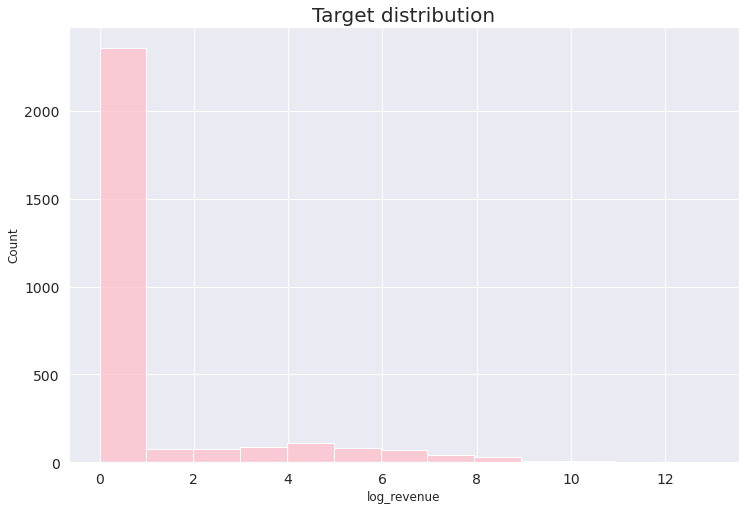

In [457]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.set_palette("bright", 10)
sns.histplot(y, color="pink")

ax.set_title('Target distribution', fontsize=20)

plt.tick_params(labelsize=14)

### Трейдерская активность

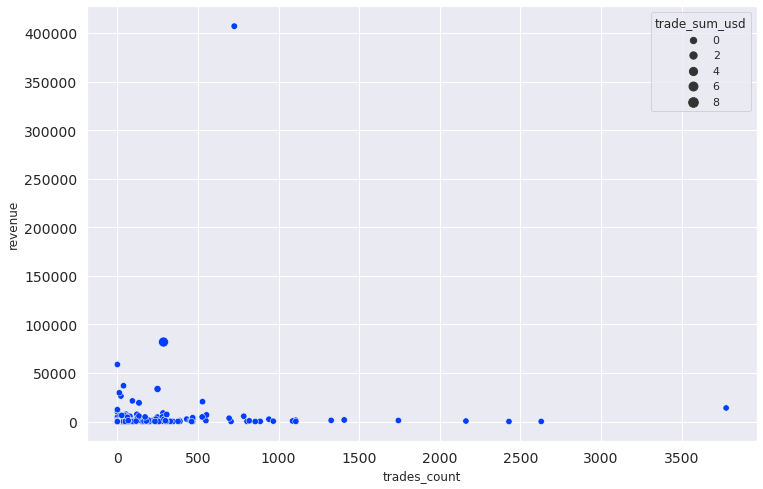

In [539]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.set_palette("bright", 10)
sns.scatterplot(data=df, x="trades_count", y="revenue", size="trade_sum_usd", sizes=(40, 100))

plt.tick_params(labelsize=14)

In [527]:
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator

class CustomLinearModel(BaseEstimator):
    """
    Wrapper class for custom linear model
    """

    def __init__(self):
        self.model = LinearRegression()

    def fit(self, X, y=None):
        self.model.fit(X, y)

        return self

    def predict(self, X):
        predictions = self.model.predict(X)

        return predictions
    
class MedianModel(BaseEstimator):
    def __init__(self):
        self.median = 0

    def fit(self, X, y=None):
        self.median = y.median()
        return self

    def predict(self, X):
        return np.ones(shape=(X.shape[0],)) * self.median

In [440]:
median_model = MedianModel()

In [441]:
median_model.fit(train_df.drop(["user", "revenue", "device", "region", "log_revenue"], axis=1), y_train)

MedianModel()

In [442]:
pred = median_model.predict(test_df.drop(["user", "revenue", "device", "region", "log_revenue", \
                                   "trade_sum_usd", "withdrawal_count"], axis=1))

In [528]:
model = CustomLinearModel()

In [529]:
train_df["trade_profit_usd"] = train_df["trade_profit_usd"].fillna(0)
test_df["trade_profit_usd"] = test_df["trade_profit_usd"].fillna(0)

for col in ["trade_profit_usd", "trade_sum_usd", "trades_count"]:
    train_df[col] = np.log(train_df[col] + 1)
    test_df[col] = np.log(test_df[col] + 1)

In [530]:
model.fit(train_df.drop(["user", "revenue", "device", "log_revenue", \
                         "trade_sum_usd", "withdrawal_count"], axis=1), y_train)

CustomLinearModel()

In [531]:
pred = model.predict(test_df.drop(["user", "revenue", "device", "log_revenue", \
                                   "trade_sum_usd", "withdrawal_count"], axis=1))

In [462]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [532]:
mean_absolute_error(test_df["revenue"], np.exp(pred))

455.782650915144

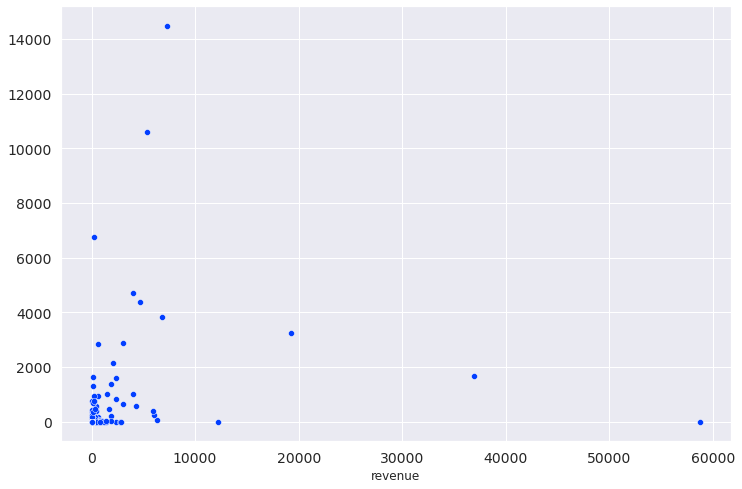

In [464]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.set_palette("bright", 10)
sns.scatterplot(x=test_df["revenue"], y=np.exp(pred))

plt.tick_params(labelsize=14)

In [278]:
model.model.coef_

array([3.89856111e-01, 2.84263049e-01, 4.46985104e-05, 2.76963956e-03])

In [332]:
pred[pred.argmax()]

20.960224519665864

In [333]:
test_df["prediction"] = pred

In [334]:
test_df.iloc[pred.argmax()]

user                           23a9a1e8
accounts_count                      2.0
deposit_count                      71.0
withdrawal_count                   24.0
trade_sum_usd             3052573.81185
trade_profit_usd                 539.27
trades_count                      182.0
revenue                        198.4242
region              Galaxy Far Far Away
device                                0
log_revenue                    5.295434
prediction                    20.960225
Name: 507, dtype: object

<AxesSubplot:>

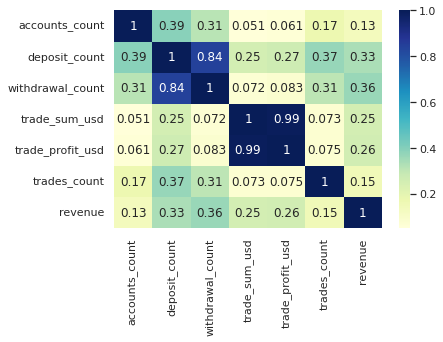

In [294]:
# plotting correlation heatmap
sns.heatmap(train_df.drop(["user", "device", "region", "log_revenue"], axis=1).corr(), cmap="YlGnBu", annot=True)

In [174]:
test_df["revenue"]

840       0.000000
1037      0.000000
2399      0.000000
678       0.000000
196     225.076199
           ...    
1916      0.000000
714       0.000000
803       0.000000
1316      0.000000
1462      0.000000
Name: revenue, Length: 883, dtype: float64

In [175]:
test_df["revenue"].sum() / 883

271.91486243984

In [ ]:
mean_absolute_error(y_test, pred)